# Zoom Emotion Analytics 

This notebook will generate 4 different charts to visualize the overall emotion attitudes of the audience during the monitored zoom call. 

### 0) General Setup

In [ ]:
#imports 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from math import pi
import seaborn as sns


/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
#Mount my drive so that I can access the results from the call. 

from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
#import the data set 
dataset = pd.read_csv('/content/drive/My Drive/Emotion/emotion_results')
columns = ['angry', 'disgust', 'fear', 'happy', 'sad', 'surprise', 'neutral', 'num_faces']
dataset.columns = columns

#make a subset of just the emotions. 
emo_df = dataset.iloc[:,:-1]

dataset.head()

,angry,disgust,fear,happy,sad,surprise,neutral,num_faces
0,0.096605,0.096487,0.109385,0.110219,0.160735,0.096488,0.330082,2.0
1,0.117226,0.117226,0.281350,0.117226,0.130296,0.117226,0.119450,1.0
2,0.142857,0.142857,0.142857,0.142857,0.142857,0.142857,0.142857,0.0
3,0.142857,0.142857,0.142857,0.142857,0.142857,0.142857,0.142857,0.0
4,0.096605,0.096487,0.109385,0.110219,0.160735,0.096488,0.330082,2.0


### 1) Radio Chart

This gives a quick snapshot of how different emotions were represented during the call

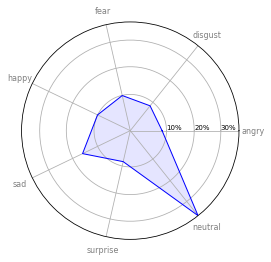

In [ ]:
#This all needs to be run in one cell

#name the categories, set the number of cats. 
categories=columns[:-1]
N = len(categories)

# We are going to plot the first line of the data frame.
# But we need to repeat the first value to close the circular graph:
values = emo_df.loc[0].values.flatten().tolist()
values += values[:1]
values

# What will be the angle of each axis in the plot: divide the plot / number of variable
angles = [n / float(N) * 2 * pi for n in range(N)]
angles += angles[:1]

# Initialize the spider plot
ax = plt.subplot(111, polar=True)
 
# Draw one axe per variable + add labels labels yet
plt.xticks(angles[:-1], categories, color='grey', size=8)
 
# Draw ylabels
ax.set_rlabel_position(0)
plt.yticks([max(values)/3, max(values)/1.7, max(values)/1.2], ['10%','20%','30%'], color="black", size=7)
plt.ylim(0,max(values))

# Plot data
ax.plot(angles, values, linewidth=1, linestyle='solid', color = 'b')
 
# Fill area
ax.fill(angles, values, 'b', alpha=0.1)


33.2

### 2) Positive / Negative Overall

This will break the emotions down into positive and negative senitments for a general score.

I am going to use seaborn because I think it looks nicer.

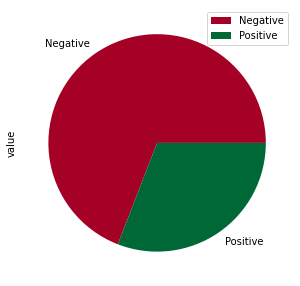

In [ ]:
#columns = ['angry', 'disgust', 'fear', 'happy', 'sad', 'surprise', 'neutral', 'num_faces']

overall_neg = dataset['angry'] + dataset['disgust'] + dataset['fear'] + dataset['sad']
overall_pos = dataset['happy'] + dataset['surprise']

neg = overall_neg.sum()
pos = overall_pos.sum()

# overall = pd.concat(overall_neg, overall_pos)
temp_df = pd.DataFrame({'value': [neg, pos]},
                  index=['Negative', 'Positive'])

plot = temp_df.plot.pie(y='value', figsize=(5, 5), colormap= 'RdYlGn')

### 3) Engagement

This will be measured by how many faces were picked up at each time. 

The model was trained on mostly forward looking faces, so if they deviate too far, they will not be found.  These were tracked as not engaged.

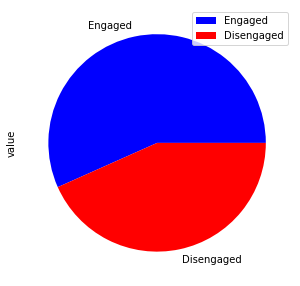

In [ ]:
total_faces  = dataset['num_faces'].sum()
frames = len(dataset)
expected_faces = 4
engage_p = total_faces/(expected_faces*frames)
diseng_p = 1 - engage_p

# overall = pd.concat(overall_neg, overall_pos)
temp_df = pd.DataFrame({'value': [engage_p, diseng_p]},
                  index=['Engaged', 'Disengaged'])

plot = temp_df.plot.pie(y='value', figsize=(5, 5), colormap= 'bwr')

### 4) Timeline

Overall timeline of the different metrics to call out areas of success or times of concern.

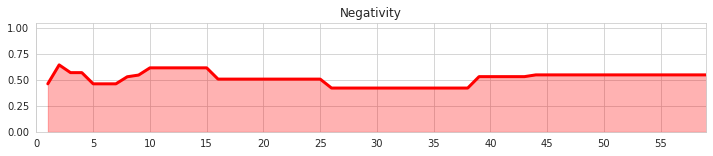

In [ ]:
#make a plotting function since I will use this a few times. 
def plot_time(x, x_tick, y, color, title):
  sns.set_style("whitegrid")
  fig, ax = plt.subplots(figsize=(12,2))
  ax.plot(x, y, color=color, lw=3)
  ax.set_title(title)
  ax.fill_between(x, 0, y, alpha=.3, color = color)
  ax.set(xlim=(0, len(x) - 1), ylim=(0, 1.05), xticks=x_tick)

#set x and x ticks 
x = range(1,61)
x_tick = range(0,60,5)

#plot negativity
plot_time(x, x_tick, overall_neg, 'r', 'Negativity')

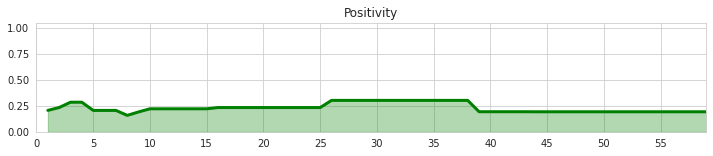

In [ ]:
#plot positivity
plot_time(x, x_tick, overall_pos, 'g', 'Positivity')

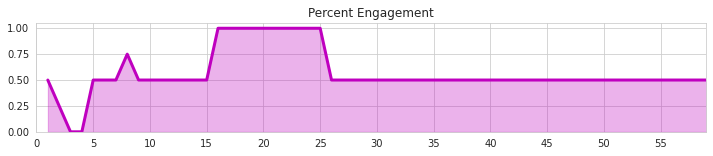

In [ ]:
#plot engagement

engagement  = dataset['num_faces']/4

plot_time(x, x_tick, engagement, 'm', 'Percent Engagement')